<a href="https://colab.research.google.com/github/ematala/satellite-segmentation/blob/main/Data_Balancing_Marc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [22]:
# load training data from npz file
data = np.load('/content/gdrive/MyDrive/train.npz')
train_data_raw = data['bands']
labels_raw = data['lulc']

In [26]:
classes = np.array(['No Data', 'Cultivated Land', 'Forest', 'Grassland', 'Shrubland', 'Water', 'Wetlands', 'Tundra', 'Artificial Surface', 'Bareland', 'Snow and Ice'])
classes_without_empty_labels=np.array(['No Data', 'Cultivated Land', 'Forest', 'Grassland', 'Shrubland', 'Water', 'Artificial Surface', 'Bareland'])
classes_without_no_data = np.array(['Cultivated Land', 'Forest', 'Grassland', 'Shrubland', 'Water', 'Wetlands', 'Tundra', 'Artificial Surface', 'Bareland', 'Snow and Ice'])

In [23]:
# Get indices where label = no data:
no_data_indices = labels_raw != 0

# Exclude them from training set:
train_data = train_data_raw[no_data_indices]
labels = labels_raw[no_data_indices]

In [24]:
# extract middle pixel data for each patch:
train_data_center_points = train_data[:,:,16,16,:]

num_data_points = 8692

# reshape data to 2D
train_data_center_points = train_data_center_points.reshape((num_data_points,72))


# Split data into train and val set:
X_train, X_val, y_train, y_val = train_test_split(train_data_center_points, labels, 
                                                    test_size=0.25, stratify = labels, random_state=42)

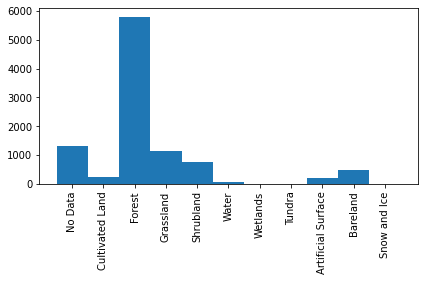

In [25]:
# Original Class distribution:
plt.hist(labels_raw, bins=list(range(len(classes) + 1)))
plt.xticks(ticks=list(map(lambda x: x+0.5, list(range(len(classes))))), labels=classes, rotation=90)
plt.tight_layout()
plt.show()

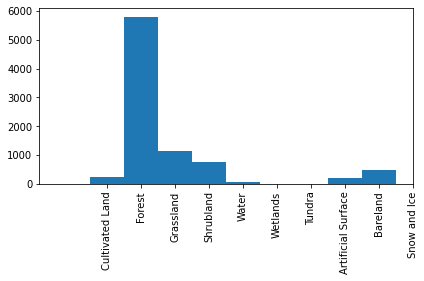

In [30]:
# Preprocessed Class distribution:
plt.hist(labels, bins=list(range(len(classes_without_no_data) + 1)))
plt.xticks(ticks=list(map(lambda x: x+1.5, list(range(len(classes_without_no_data))))), labels=classes_without_no_data, rotation=90)
plt.tight_layout()
plt.show()

In [37]:
# SMOTE Data Augmentation
smote= SMOTE() # Data Augmentation by synthezising data until balanced
#adasyn = ADASYN() # 
#smote_enn = SMOTEENN(random_state=0) # Combination of Under- and Oversampling
#smote_tomek = SMOTETomek(random_state=0) # Combination of Under- and Oversampling
train_data_SMOTE, labels_SMOTE = smote.fit_resample(train_data_center_points, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

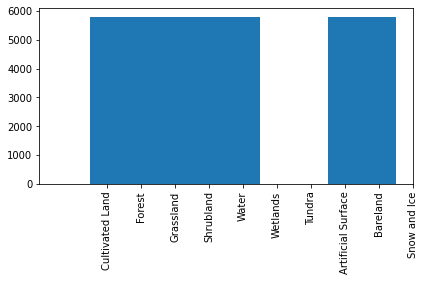

In [38]:
# SMOTE Preprocessing Class distribution:
plt.hist(labels_SMOTE, bins=list(range(len(classes_without_no_data) + 1)))
plt.xticks(ticks=list(map(lambda x: x+1.5, list(range(len(classes_without_no_data))))), labels=classes_without_no_data, rotation=90)
plt.tight_layout()
plt.show()

In [39]:
# Over Sampling Data Balancing

ros = RandomOverSampler()
train_data_ROS, labels_ROS = ros.fit_resample(train_data_center_points, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


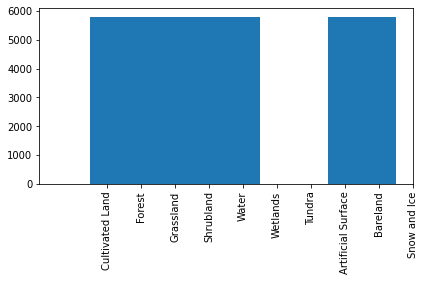

In [40]:
# ROS Balancing Class distribution:
plt.hist(labels_ROS, bins=list(range(len(classes_without_no_data) + 1)))
plt.xticks(ticks=list(map(lambda x: x+1.5, list(range(len(classes_without_no_data))))), labels=classes_without_no_data, rotation=90)
plt.tight_layout()
plt.show()